## Advanced Lane Finding
[![Udacity - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)


In this project, your goal is to write a software pipeline to identify the lane boundaries in a video, but the main output or product we want you to create is a detailed writeup of the project.  Check out the [writeup template](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) for this project and use it as a starting point for creating your own writeup.  

Creating a great writeup:
---
1. A great writeup should include the rubric points as well as your description of how you addressed each point.  
2. You should include a detailed description of the code used in each step (with line-number references and code snippets where necessary), and links to other supporting documents or external references. 
3. You should include images in your writeup to demonstrate how your code works with examples.  

All that said, please be concise!  We're not looking for you to write a book here, just a brief description of how you passed each rubric point, and references to the relevant code :). 

You're not required to use markdown for your writeup.  If you use another method please just submit a pdf of your writeup.

The Project
---

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


1. The images for camera calibration are stored in the folder called `camera_cal`.  
2. The images in `test_images` are for testing your pipeline on single frames.  
3. If you want to extract more test images from the videos, you can simply use an image writing method like `cv2.imwrite()`, i.e., you can read the video in frame by frame as usual, and for frames you want to save for later you can write to an image file.  

To help the reviewer examine your work, please save examples of the output from each stage of your pipeline in the folder called `ouput_images`, and include a description in your writeup for the project of what each image shows.    The video called `project_video.mp4` is the video your pipeline should work well on.  

The `challenge_video.mp4` video is an extra (and optional) challenge for you if you want to test your pipeline under somewhat trickier conditions.  The `harder_challenge.mp4` video is another optional challenge and is brutal!

If you're feeling ambitious (again, totally optional though), don't stop there!  We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!

---


# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./examples/undistort_output.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"

## [Rubric](https://review.udacity.com/#!/rubrics/571/view) Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  

You're reading it!

### Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in the first code cell of the IPython notebook located in "./examples/example.ipynb" (or in lines # through # of the file called `some_file.py`).  

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.  

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained this result: 

![alt text][image1]

### Pipeline (single images)

#### 1. Provide an example of a distortion-corrected image.
To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:

![alt text][image2]

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.
I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines # through # in `another_file.py`).  Here's an example of my output for this step.  (note: this is not actually from one of the test images)

![alt text][image3]

#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `warper()`, which appears in lines 1 through 8 in the file `example.py` (output_images/examples/example.py) (or, for example, in the 3rd code cell of the IPython notebook).  The `warper()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

```
This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

![alt text][image4]

#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

Then I did some other stuff and fit my lane lines with a 2nd order polynomial kinda like this:

![alt text][image5]

#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

I did this in lines # through # in my code in `my_other_file.py`

#### 6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

I implemented this step in lines # through # in my code in `yet_another_file.py` in the function `map_lane()`.  Here is an example of my result on a test image:

![alt text][image6]

---

### Pipeline (video)

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Here's a [link to my video result](./project_video.mp4)

---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  



---
# Camera Calibration with OpenCV


### Run the code below to extract object points and image points for camera calibration.  

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pickle

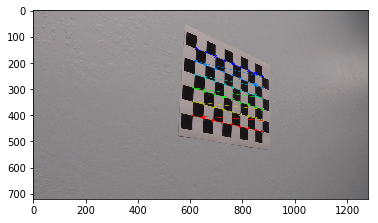

In [2]:
# Specify number of corners
CORNERS_ROW = 9
CORNERS_COL = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CORNERS_COL*CORNERS_ROW,3), np.float32)
objp[:,:2] = np.mgrid[0:CORNERS_ROW, 0:CORNERS_COL].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/cal*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (CORNERS_ROW,CORNERS_COL), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (CORNERS_ROW,CORNERS_COL), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)  # show the found image
        #cv2.waitKey(500)        # pause before showing next image
        plt.imshow(img)

#cv2.destroyAllWindows()

In [3]:
len(imgpoints)

17

In [4]:
len(objpoints)

17

### We now have `objpoints` and `imgpoints` needed for camera calibration.  

Run the cell below to:
1. calibrate
2. calculate distortion coefficients
3. test undistortion on an image

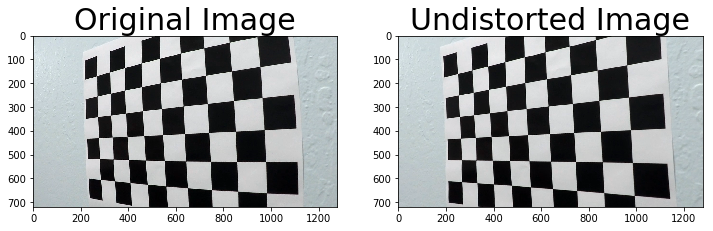

In [23]:
# Test undistortion on an image
img = cv2.imread('examples/test_board.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
#pickle.dump(dist_pickle, open( "examples/camera_cal_dist.p", "wb" ))
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30);

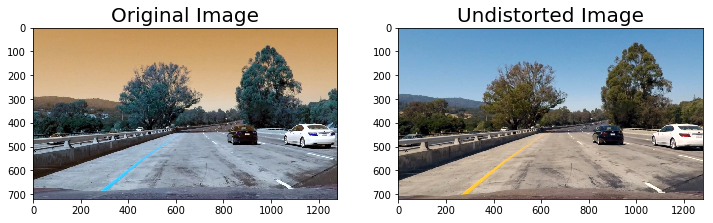

In [25]:
# Test undistortion on a road image
img2 = cv2.imread('test_images/test1.jpg')
img_size2 = (img2.shape[1], img2.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size2,None,None)

dst2 = cv2.undistort(img2, mtx, dist, None, mtx)
cv2.imwrite('output_images/test2_undist.jpg',dst2)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(img2)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst2)
ax2.set_title('Undistorted Image', fontsize=20);

## Perspective Transform - checkerboard

In [7]:
corners.shape

(54, 1, 2)

In [37]:
corners[0:4,0,:]

array([[ 623.08917236,  147.099823  ],
       [ 661.24267578,  162.44380188],
       [ 697.01104736,  177.04519653],
       [ 731.55212402,  191.6693573 ]], dtype=float32)

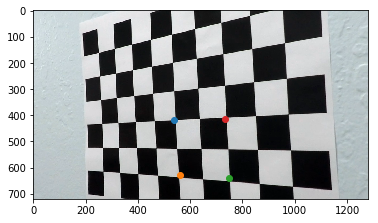

In [18]:
# try to plot a rectangle
plt.imshow(dst)
plt.plot((img_size[0] / 2) - 100, img_size[1] / 2 + 60, 'o')  # top left
plt.plot((img_size[0] / 2) - 80, img_size[1]-90, 'o')  # bottom left
plt.plot((img_size[0] / 2) + 110, img_size[1]-80, 'o')  # bottom right
plt.plot((img_size[0] / 2) + 95, img_size[1] / 2 + 55, 'o');  # top right

In [8]:
# source image
src = np.float32([
        [540, 420],  # top left
        [560, 630],  # bottom left
        [750, 640],  # bottom right
        [735, 415]   # top right
    ])

# destination warped image
dst = np.float32([
        [540, 420],  # top left
        [540, 630],  # bottom left
        [735, 630],  # bottom right
        [735, 420]   # top right
    ])

# transorm
M = cv2.getPerspectiveTransform(src, dst)

# inverse transform
Minv = cv2.getPerspectiveTransform(dst, src)

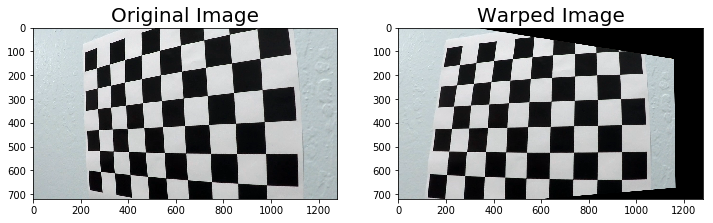

In [9]:
# warp an image
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

# Visualize warping
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=20);

## Perspective Transform - road image

In [10]:
### Sample coords from road image
# source image
src = np.float32([
        [(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
        [((img_size[0] / 6) - 10), img_size[1]],
        [(img_size[0] * 5 / 6) + 60, img_size[1]],
        [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]
    ])

# destination warped image
dst = np.float32([
        [(img_size[0] / 4), 0],
        [(img_size[0] / 4), img_size[1]],
        [(img_size[0] * 3 / 4), img_size[1]],
        [(img_size[0] * 3 / 4), 0]
    ])

# transorm
M = cv2.getPerspectiveTransform(src, dst)

# inverse transform
Minv = cv2.getPerspectiveTransform(dst, src)

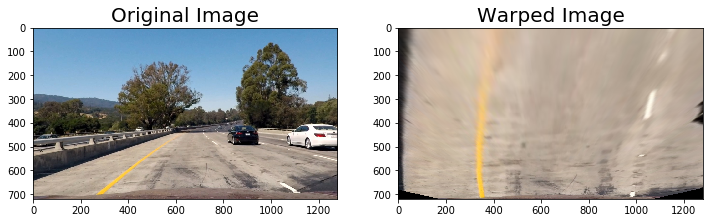

In [11]:
# warp the undistorted road image
warped = cv2.warpPerspective(dst2, M, img_size, flags=cv2.INTER_LINEAR)

# Visualize warping
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(dst2)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=20);

## Undistort and Transform checkerboard

In [15]:
def corners_unwarp(img, nx, ny, mtx, dist):
    '''
    1. Undistort image
    2. Convert grayscale
    3. Find chessboard corners
    4. Get perspective transform
    5. Use the transform matrix
    6. Return `warped` (image), `M` (matrix)
    '''

    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # 4) If corners found: 
    if ret==True:
            # a) draw corners
            cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
            
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            # Use corners that were automatically detected during the undistortion steps
            img_size = (gray.shape[1], gray.shape[0])
            offset = 100
            
            # For source points use the outer four detected corners
            src = np.float32([
                    corners[0], 
                    corners[nx-1], 
                    corners[-1], 
                    corners[-nx]
                ])
            
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            dst = np.float32([
                    [offset, offset], 
                    [img_size[0]-offset, offset], 
                    [img_size[0]-offset, img_size[1]-offset], 
                    [offset, img_size[1]-offset]
                ])

            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            warped = cv2.warpPerspective(undist, M, img_size)
            
    return warped, M


In [ ]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [ ]:
# Read in an image
img = cv2.imread('examples/test_board.jpg')
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

---
# Sobel Operator
The Sobel operator is at the heart of the Canny edge detection algorithm you used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the x or y direction. 

In [43]:
def plot_images(images, titles, figsize=(10,5)):
    '''Plot image in 1 row
    images: list of images to plot
    titles: list of plot titles
    '''
    num=len(images)
    fig, ax = plt.subplots(1, num, figsize=figsize)
    fig.tight_layout()
    for i in range(num):
        ax[i].imshow(images[i], cmap='gray')
        ax[i].set_title(titles[i], fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

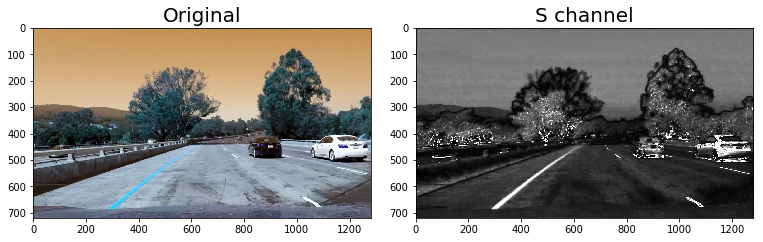

In [27]:
# Look at original and HLS image
plot_images([img2[:,:,:], cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)[:,:,2]], ['Original', 'S channel'])

(720, 1280, 3)


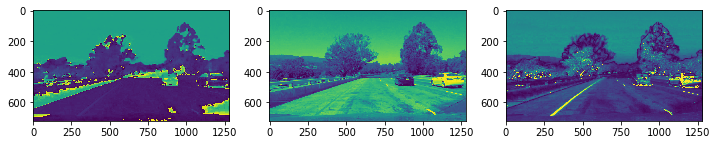

In [29]:
# Look at HLS channels
print(img2.shape)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)[:,:,0])
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)[:,:,1])
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)[:,:,2])
plt.tight_layout()

You need to pass a single color channel to the cv2.Sobel() function, so first convert it to grayscale:

In [78]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)[:,:,2]  # use HLS 3rd channel

Make sure you use the correct grayscale conversion depending on how you've read in your images. 
- Use cv2.COLOR_RGB2GRAY if you've read in an image using mpimg.imread(). 
- Use cv2.COLOR_BGR2GRAY if you've read in an image using cv2.imread().

Calculate the derivative in the x direction (the 1, 0 at the end denotes x direction):



In [79]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobelx

array([[   0., -506.,    8., ...,  -22.,  194.,    0.],
       [   0., -260.,  100., ...,   10.,  262.,    0.],
       [   0.,   82.,  195., ...,   10.,  173.,    0.],
       ..., 
       [   0.,   30.,   44., ...,    6.,  -13.,    0.],
       [   0.,    9.,   44., ...,    0.,    6.,    0.],
       [   0.,   -4.,   44., ...,   -4.,   26.,    0.]])

Calculate the derivative in the y direction (the 0, 1 at the end denotes y direction):



In [80]:
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
sobely

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [-510., -264.,   74., ..., -152.,  -52.,   16.],
       [   2.,   98.,  197., ...,  160.,  -29., -186.],
       ..., 
       [   2.,   -6.,  -14., ...,   -8.,  -11.,  -12.],
       [  14.,    1.,  -12., ...,   10.,   26.,   46.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [81]:
# Calculate the absolute value of the x derivative:
abs_sobelx = np.abs(sobelx)

#Convert the absolute value image to 8-bit:
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png. You could just as well choose a different standard range of values, like 0 to 1 etc.

Create a binary threshold to select pixels based on gradient strength:

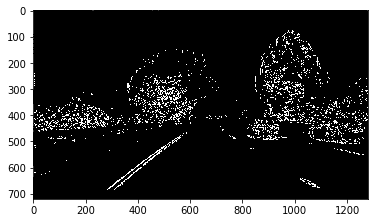

In [85]:
thresh_min = 25
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray');

## Applying Sobel

In [31]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, sobel_kernel=3, orient='x', thresh=(0,255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.abs(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.abs(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    return binary_output

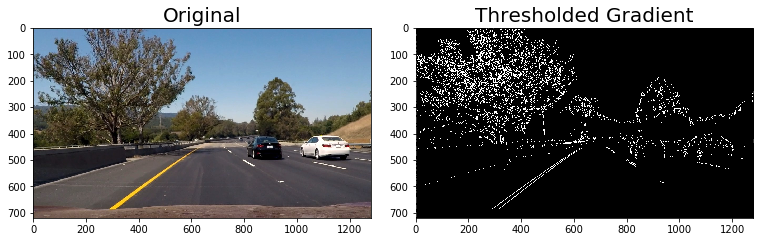

In [34]:
# Read in an image
image = mpimg.imread('./test_images/test6.jpg')

# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh=(35,100))

# Plot the result
plot_images([image, grad_binary], ['Original', 'Thresholded Gradient'])

## Magnitude of the Gradient
The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the x and y directions, the magnitude is the square root of the sum of the squares.


abs_sobelxy=√
​(sobel
​x
​​ )
​2
​​ +(sobel
​y
​​ )
​2
​​ 
​
​​ 

In [36]:
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output


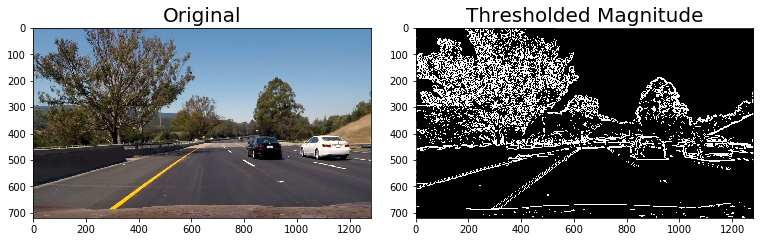

In [37]:
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))

# Plot the result
plot_images([image, mag_binary], ['Original', 'Thresholded Magnitude'])

## Direction of the Gradient
The direction of the gradient is simply the inverse tangent (arctangent) of the y gradient divided by the x gradient:

arctan(sobel
​y
​​ /sobel
​x
​​ ).

- Each pixel of the resulting image contains a value for the angle of gradient away from horizontal in units of radians, covering a range of −π/2 to π/2. 
- An orientation of 0 implies a horizontal line and orientations of +/−π/2 imply vertical lines.


In [38]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.abs(sobely), np.abs(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return binary_output

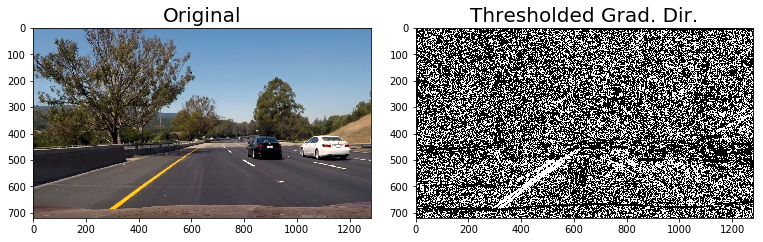

In [39]:
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Plot the result
plot_images([image, dir_binary], ['Original', 'Thresholded Grad. Dir.'])

## Combining Thresholds
Now consider how you can use various aspects of your gradient measurements (x, y, magnitude, direction) to isolate lane-line pixels. 

Specifically, think about how you can use:
- thresholds of the x and y gradients, 
- the overall gradient magnitude, 
- the gradient direction to focus on pixels that are likely to be part of the lane lines


In [40]:
# Choose a Sobel kernel size
ksize = 3  # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(30, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

Try different combinations and see what you get.

For example, here is a selection for pixels where both the x and y gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.

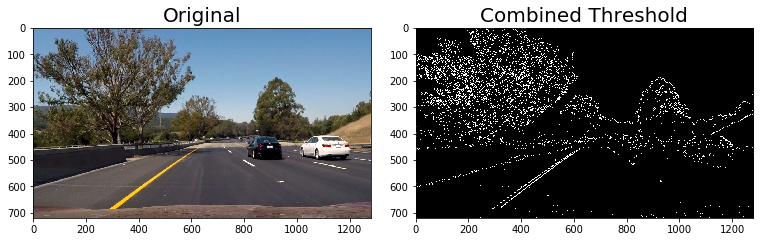

In [47]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
plot_images([image, combined], ['Original', 'Combined Threshold'])

---
# Color Spaces

### Constants

V
​max
​​ ←max(R,G,B)

V
​min
​​ ←min(R,G,B)

These are the maximum and minimum values across all three RGB values for a given color.

### H channel conversion equations

There are three different equations, which one is used depends on the the value of V
​max
​​  whether that's R, G, or B.

H←
​Vmax−Vmin
​
​30(G−B)
​​  , if V
​max
​​ =R

H←60+
​Vmax−Vmin
​
​30(B−R)
​​  , if V
​max
​​ =G

H←120+
​Vmax−Vmin
​
​30(R−G)
​​  , if V
​max
​​ =B

Note: In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

### L channel conversion equation

L←
​2
​
​Vmax+Vmin
​​ 

### S channel conversion equations

There are two possible equations; one is used depending on the value of L.

S←
​Vmax+Vmin
​
​Vmax−Vmin
​​ , if L<0.5

S←
​2−(Vmax+Vmin)
​
​Vmax−Vmin
​​ , if L≥0.5

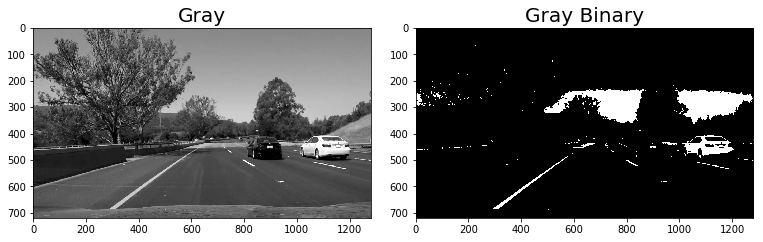

In [49]:
# convert to grayscale, and apply a threshold that identifies the lines:
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

plot_images([gray, binary], ['Gray', 'Gray Binary'])

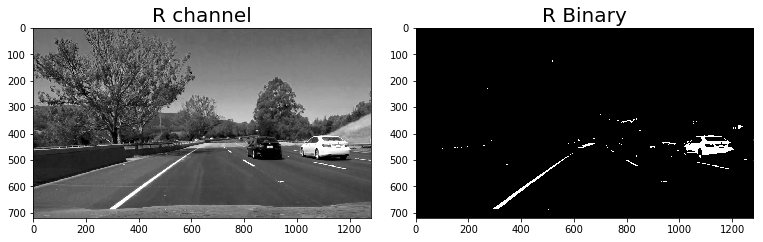

In [50]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

plot_images([R,binary], ['R channel','R Binary'])

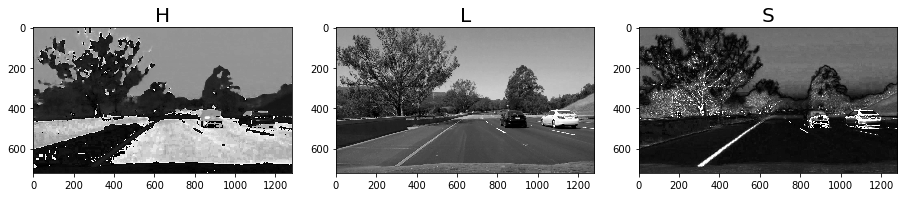

In [51]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

plot_images([H,L,S], ['H','L','S'], (12,4))

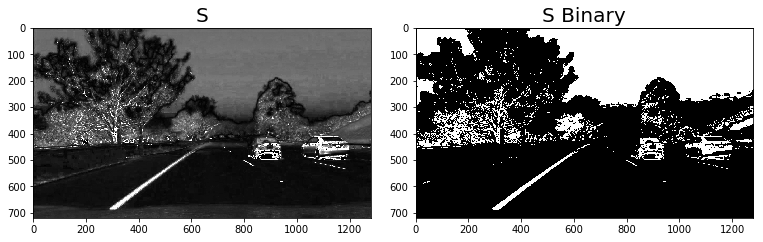

In [52]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

plot_images([S,binary], ['S','S Binary'])

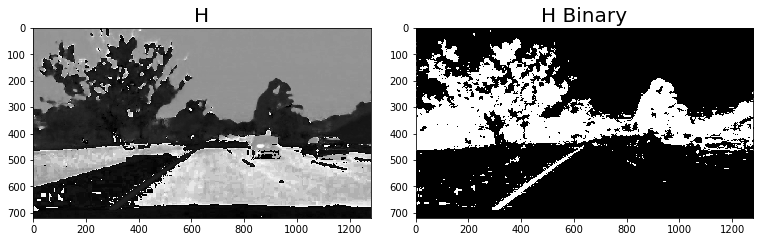

In [53]:
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

plot_images([H,binary], ['H','H Binary'])

### HLS Color threshold function

In [54]:
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

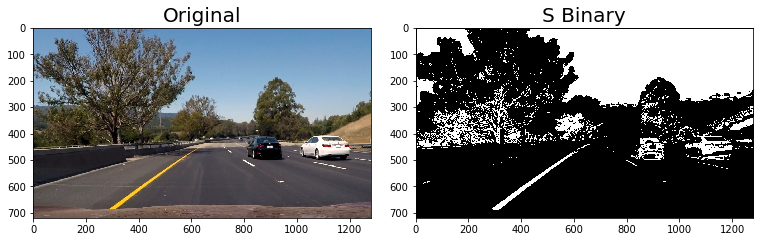

In [55]:
hls_binary = hls_select(image, thresh=(90, 255))
plot_images([image,hls_binary], ['Original','S Binary'])

# Color and Gradient
- see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. 
- create a binary combination of these two images to map out where either the color or gradient thresholds were met.

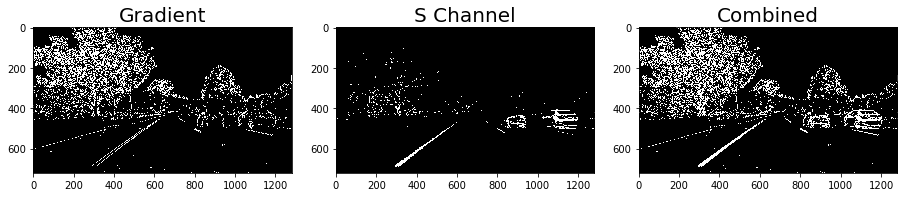

In [68]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
plot_images([sxbinary, s_binary, combined_binary], ['Gradient','S Channel', 'Combined'], figsize=(12,6))


In [88]:
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    '''Combine Gradient and Color Threshold'''
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    s_channel = hsv[:,:,1]
    v_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0)  # Take the derivative in x
    abs_sobelx = np.absolute(sobelx)  # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel < s_thresh[1])] = 1
    
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    
    result = np.zeros_like(sxbinary)
    result[(s_binary == 1) | (sxbinary == 1)] = 1

    return result, color_binary
    

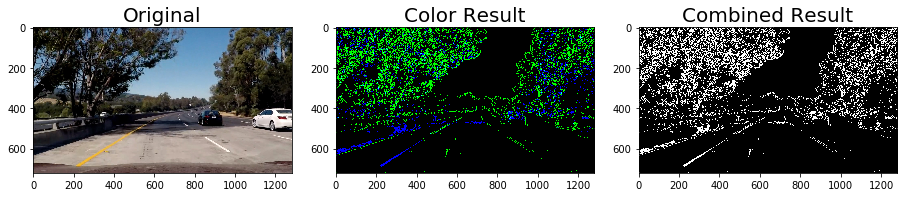

In [154]:
image = mpimg.imread('./test_images/test5.jpg')
result, color_binary = pipeline(image, s_thresh=(150, 255), sx_thresh=(40, 100))

# Plot the result
plot_images([image, color_binary, result], ['Original', 'Color Result', 'Combined Result'], (12,6))

# Project Steps
1. Camera calibration
2. Distortion correction
3. Color/gradient threshold
4. Perspective transform

5. Detect lane lines
6. Determine the lane curvature

## Processing each image
### Camera calibrate and undistort
In the project at the end of this module, the first thing you'll do is to compute the camera calibration matrix and distortion coefficients. 

### Thresholding
You'll want to try out various combinations of color and gradient thresholds to generate a binary image where the lane lines are clearly visible.

### Perspective Transform
- identify four source points for your perspective transform. In this case, you can assume the road is a flat plane. 
- The easiest way to do this is to investigate an image where the lane lines are straight, and find four points lying along the lines that, after perspective transform, make the lines look straight and vertical from a bird's eye view perspective.

In [86]:
### Sample coords from road image
# source image
src = np.float32([
        [(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
        [((img_size[0] / 6) - 10), img_size[1]],
        [(img_size[0] * 5 / 6) + 60, img_size[1]],
        [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]
    ])

# destination warped image
dst = np.float32([
        [(img_size[0] / 4), 0],
        [(img_size[0] / 4), img_size[1]],
        [(img_size[0] * 3 / 4), img_size[1]],
        [(img_size[0] * 3 / 4), 0]
    ])

# transorm
M = cv2.getPerspectiveTransform(src, dst)

# inverse transform
Minv = cv2.getPerspectiveTransform(dst, src)

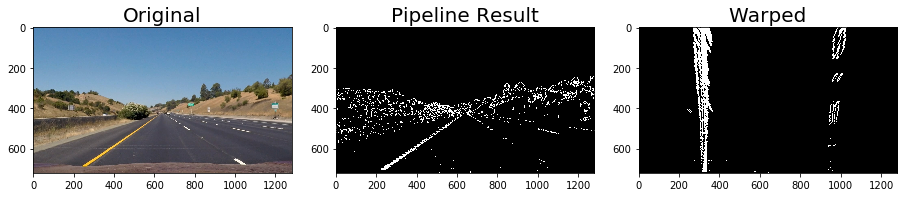

In [179]:
# Look at lane with straight lines
image = mpimg.imread('./test_images/straight_lines1.jpg')

# Undistort with camera calibration matrix
image_dst = cv2.undistort(image, mtx, dist, None, mtx)

# Generate binary image(s) with pipeline
result, color_binary = pipeline(image_dst, s_thresh=(180, 240), sx_thresh=(20, 80))

# Warp the undistorted road image
warped = cv2.warpPerspective(result, M, img_size, flags=cv2.INTER_LINEAR)

# Visualize warping
plot_images([image, result, warped], ['Original', 'Pipeline Result', 'Warped'], (12,6))

### Curved lines
- Those same four source points will now work to transform any image (again, under the assumption that the road is flat and the camera perspective hasn't changed). 
- the test of whether the transform is correct is that the lane lines should appear parallel in the warped images, whether they are straight or curved.

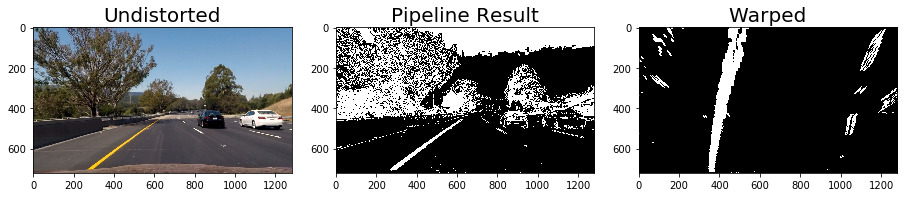

In [209]:
# Look at lane with curved lines
image = mpimg.imread('./test_images/test6.jpg')
image_dst = cv2.undistort(image, mtx, dist, None, mtx)
result, color_binary = pipeline(image_dst, s_thresh=(100, 255), sx_thresh=(20, 100))

# Warp the undistorted road image
binary_warped = cv2.warpPerspective(result, M, img_size, flags=cv2.INTER_LINEAR)

# Visualize warping
plot_images([image_dst, result, binary_warped], ['Undistorted', 'Pipeline Result', 'Warped'], (12,6))

## Locate the Lane Lines and Fit a Polynomial
### Line Finding Method: Peaks in a Histogram

After applying calibration, thresholding, and a perspective transform to a road image, you should have a binary image where the lane lines stand out clearly. 

In [160]:
binary_warped.shape

(720, 1280)

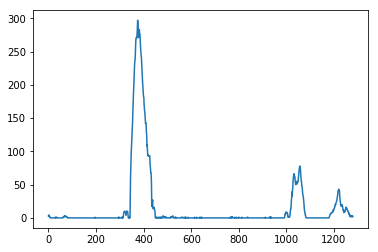

In [210]:
img = binary_warped.copy()
img_shape_y, img_shape_x = img.shape

histogram = np.sum(img[int(img_shape_y/2):,:], axis=0)
plt.plot(histogram);

### Sliding Window
- With this histogram I am adding up the pixel values along each column in the image. 
- In my thresholded binary image, pixels are either 0 or 1, so the two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines.

### Implement Sliding Windows and Fit a Polynomial


In [211]:
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
mask_y = int(binary_warped.shape[0]/2)
histogram = np.sum(binary_warped[mask_y:,:], axis=0)

# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)

# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base

# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print(left_fit.shape)
print(right_fit.shape)

(3,)
(3,)


### Visualization

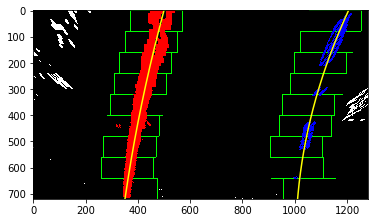

In [212]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow');

### Skip the sliding windows step once you know where the lines are

In [223]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

### Visualize the search performed in a margin around the previous line position

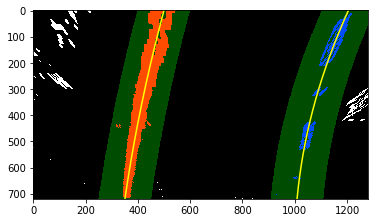

In [224]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow');

## Sliding Window Search w/ convolution
- Apply a convolution, which will maximize the number of "hot" pixels in each window
- A convolution is the summation of the product of two separate signals, in our case the window template and the vertical slice of the pixel image.
 
 
- Slide the window template across the image from left to right and any overlapping values are summed together, creating the convolved signal
- The peak of the convolved signal is where there was the highest overlap of pixels and the most likely position for the lane marker.

In [226]:
def window_mask(width, height, img_ref, center,level):
    '''Apply mask to image to '''
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    '''Run the sliding window search'''
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

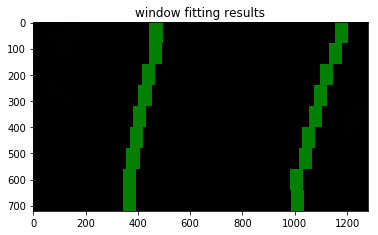

In [228]:
# Read in a thresholded image
warped = binary_warped.copy()

# window settings
window_width = 50 
window_height = 80  # Break image into 9 vertical layers since image height is 720
margin = 100  # How much to slide left and right for searching

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()

## Measuring Curvature
- You have a thresholded image, where you've estimated which pixels belong to the left and right lane lines
- You've fit a polynomial to those pixel positions
- Next we'll compute the radius of curvature of the fit



### Radius of Curvature
The radius of curvature ([awesome tutorial here](http://www.intmath.com/applications-differentiation/8-radius-curvature.php)) at any point x of the function x=f(y) is given as follows:

R
​curve
​​ =
​∣
​dy
​2
​​ 
​
​d
​2
​​ x
​​ ∣
​
​[1+(
​dy
​
​dx
​​ )
​2
​​ ]
​3/2
​​ 
​​ 

In the case of the second order polynomial above, the first and second derivatives are:

f
​′
​​ (y)=
​dy
​
​dx
​​ =2Ay+B

f
​′′
​​ (y)=
​dy
​2
​​ 
​
​d
​2
​​ x
​​ =2A

So, our equation for radius of curvature becomes:

R
​curve
​​ =
​∣2A∣
​
​(1+(2Ay+B)
​2
​​ )
​3/2
​​ 
​​ 

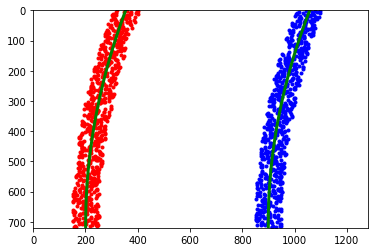

In [229]:
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis()  # to visualize as we do the images

### Now we have polynomial fits and we can calculate the radius of curvature as follows:

In [230]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

1642.12021487 1572.28281609


We've calculated the radius of curvature based on pixel values, so the radius we are reporting is in pixel space, which is not the same as real world space. So we actually need to repeat this calculation after converting our x and y values to real world space.


This involves measuring how long and wide the section of lane is that we're projecting in our warped image. We could do this in detail by measuring out the physical lane in the field of view of the camera, but for this project, you can assume that if you're projecting a section of lane similar to the images above, the lane is about 30 meters long and 3.7 meters wide. Or, if you prefer to derive a conversion from pixel space to world space in your own images, compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, and the dashed lane lines are 10 feet or 3 meters long each.

### Repeat the calculation of radius of curvature after correcting for scale in x and y

In [233]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720   # meters per pixel in y dimension
xm_per_pix = 3.7/700  # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print('{:.2f} m,  {:.2f} m'.format(left_curverad, right_curverad))

539.33 m,  516.37 m


Check out the U.S. government specifications for highway curvature to see how your numbers compare:  http://onlinemanuals.txdot.gov/txdotmanuals/rdw/horizontal_alignment.htm#BGBHGEGC
